In [1]:
from numpy.random import randint,choice,seed
from numpy import linspace, empty, zeros, ones
from math import ceil,floor
from numpy import mean,var,std,arange,array,concatenate
from tree import generate_tree
import matplotlib.pyplot as plt

In [2]:
leaf_counter = 0

# The gametree is generated in the following fashion:
# 1. A number of leaves is calculated for the case fanout=2, depth=2*k
# 2. Then, balanced binary tree is generated using the function 'generate_tree'
# The parameters are:
#     terminal_size = d**(2*k)
#     fanout = 2
#     p - the parameter of binomial distribution that determines the distribution
#     0 and 1 in the last level of the tree
#
# You need to implement a function 'evaluate' that has the following properties:
# 1. The input to the function is the current tree node
# and the strategy ("min" or "max")
# 2. The function should perform in a recursive fashion, i.e. evaluation of the
# current node is performed by evaluating child nodes
# 3. The order of evaluating child nodes is random
# 4. The strategy flips upon every recursive call, i.e. the even levels of tree
# are evaluated with "max" strategy, and odd levels are evaluated with "min"
# strategy
# 5. The recursion terminates when leaf node is reached, and the value of the
# node returned (node.value)
#
# Write a function 'evaluate_tree_instance' that accepts a root tree as the
# input, and measures the number of leaves visited during the tree evaluation.
# Hint: use global variable and modify its value when leaf node is reached in
# 'evaluate' procedure
#
# Perform following experiments:
# 1. Vary the value of k = 2:7 and measure the number of evaluated leaves
# 2. Vary the value of p = .1:.9 and measure the number of evaluated leaves
# 3. Perform the comparison randomized and deterministic versions of the
# algorithm

In [3]:
leaves = 0

In [15]:
def evaluate(strategy, node):
    global leaves
    if node.is_leaf:
        leaves += 1
        return node.value
    dir = randint(2)
    if strategy == 0:
        cld1_val = evaluate(1, node.children[dir])
        if cld1_val == 0:
            return 0
        cld2_val = evaluate(1, node.children[1-dir])
        return min(cld1_val, cld2_val)
    if strategy == 1:
        cld1_val = evaluate(0, node.children[dir])
        if cld1_val == 1:
            return 1
        cld2_val = evaluate(0, node.children[1-dir])
        return max(cld1_val, cld2_val)
    

In [24]:
def evaluate_det(strategy, node):
    global leaves
    if node.is_leaf:
        leaves += 1
        return node.value
    if strategy == 0:
        cld1_val = evaluate_det(1, node.children[0])
        if cld1_val == 0:
            return 0
        cld2_val = evaluate_det(1, node.children[1])
        return min(cld1_val, cld2_val)
    if strategy == 1:
        cld1_val = evaluate_det(0, node.children[0])
        if cld1_val == 1:
            return 1
        cld2_val = evaluate_det(0, node.children[1])
        return max(cld1_val, cld2_val)
    

In [25]:
def evaluate_tree_instance(root):
    global leaves
    leaves = 0
    evaluate(1, root)
#     print('Number of leaf evaluations = {:d}'.format(leaves))
    return leaves

In [26]:
def det_evaluate_tree_instance(root):
    global leaves
    leaves = 0
    evaluate_det(1, root)
#     print('Number of leaf evaluations = {:d}'.format(leaves))
    return leaves

In [27]:
d = 2 # Fanout
psteps = 10
ksteps = 6
result = zeros((psteps, ksteps))#, dtype=int)
result_det = zeros((psteps, ksteps))#, dtype=int)
i,j=0,0
avg_amnt=11

for p in linspace(.1,1,psteps):
    j=0
#     print('p =',p)
    for k in linspace(2,7,ksteps, dtype=int): # number of turns in the game tree
        number_of_leaves = d**(2*k)
        for l in range(1,avg_amnt,1):
            atree = generate_tree(number_of_leaves, p=p)
            result[i,j] += evaluate_tree_instance(atree)/number_of_leaves
            result_det[i,j] += det_evaluate_tree_instance(atree)/number_of_leaves
        j += 1
    i += 1
result /= (avg_amnt-1)
result_det /= (avg_amnt-1)    

In [28]:
result_det

array([[ 0.28125   ,  0.134375  ,  0.06796875,  0.034375  ,  0.0177002 ,
         0.00896606],
       [ 0.3       ,  0.1734375 ,  0.07617188,  0.04013672,  0.02021484,
         0.00998535],
       [ 0.38125   ,  0.1671875 ,  0.08945312,  0.04980469,  0.02443848,
         0.01221924],
       [ 0.36875   ,  0.24375   ,  0.11484375,  0.05957031,  0.02893066,
         0.01551514],
       [ 0.41875   ,  0.2671875 ,  0.15820312,  0.08759766,  0.04091797,
         0.02410278],
       [ 0.40625   ,  0.271875  ,  0.18007813,  0.14179687,  0.07709961,
         0.0524231 ],
       [ 0.3875    ,  0.221875  ,  0.14453125,  0.08173828,  0.03518066,
         0.01826782],
       [ 0.375     ,  0.184375  ,  0.10820312,  0.04677734,  0.0255127 ,
         0.0130188 ],
       [ 0.3125    ,  0.1484375 ,  0.0703125 ,  0.03662109,  0.01867676,
         0.00922852],
       [ 0.25      ,  0.125     ,  0.0625    ,  0.03125   ,  0.015625  ,
         0.0078125 ]])

In [29]:
fig,ax = plt.subplots(2,2, figsize=[15,10])
ax[0][0].plot(linspace(2,7,ksteps, dtype=int), result[4,:], label='rnd')
ax[0][0].plot(linspace(2,7,ksteps, dtype=int), result_det[4,:], label='det')
ax[0][0].grid()
ax[0][0].legend()
ax[0][0].set_title('Performance vs. depth (p=0.5)')

ax[0][1].plot(linspace(.1,1,psteps), result[:,-1], label='rnd')
ax[0][1].plot(linspace(.1,1,psteps), result_det[:,-1], label='det')
ax[0][1].grid()
ax[0][1].legend()
ax[0][1].set_title('Performance vs. proba (k=7)')

In [30]:
ax[1][0].plot(linspace(2,7,ksteps, dtype=int), result[4,:], label='rnd')
ax[1][0].plot(linspace(2,7,ksteps, dtype=int), result_det[4,:], label='stupid_det')
ax[1][0].grid()
ax[1][0].legend()

ax[1][1].plot(linspace(.1,1,psteps), result[:,-1], label='rnd')
ax[1][1].plot(linspace(.1,1,psteps), result_det[:,-1], label='stupid_det')
ax[1][1].grid()
ax[1][1].legend()

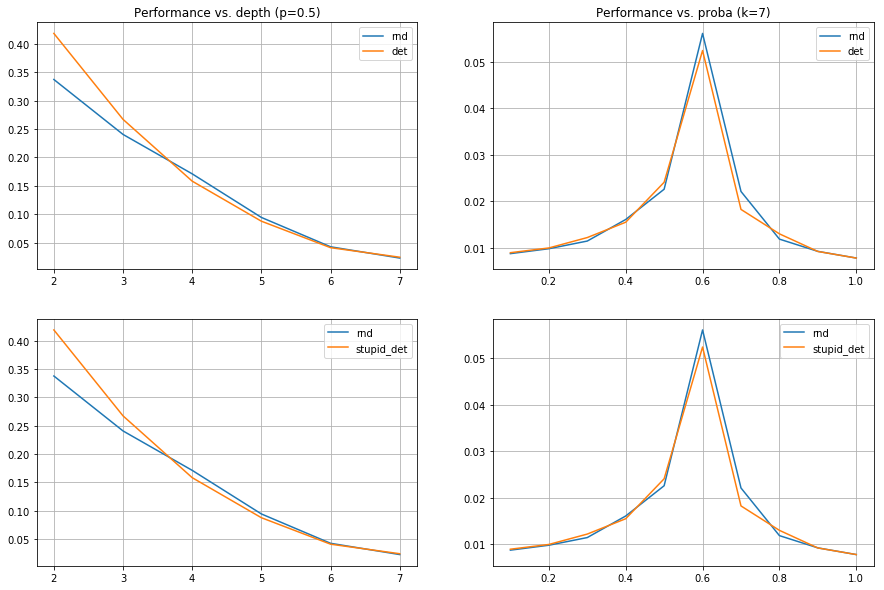

In [31]:
plt.show()

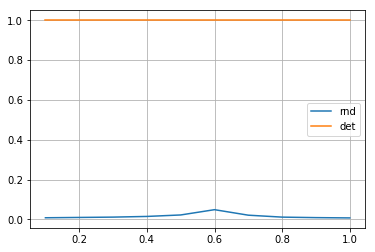

In [13]:
plt.plot(linspace(.1,1,psteps), result[:,-1], label='rnd')
plt.plot(linspace(.1,1,psteps), result_det[:,-1], label='det')
plt.grid()
plt.legend()
plt.show()